In [60]:
#mysql-connector-python
import mysql.connector
import pandas as pd
import matplotlib.pyplot as plt

In [61]:
connection = mysql.connector.connect(
user='root',
password='',
host='localhost',
database='Walmart'
)

In [62]:
# Create a cursor object to execute SQL queries
cursor = connection.cursor()

In [63]:
# Query data from the 'customer' table
cursor.execute('SELECT * FROM customers')
#After fetching data from the database we are storing it into Pandas DataFrame
customers_data = pd.DataFrame(cursor.fetchall(), columns=[desc[0] for desc in
cursor.description])

In [64]:
# Query data from the 'product' table
cursor.execute('SELECT * FROM Products')
products_data = pd.DataFrame(cursor.fetchall(), columns=[desc[0] for desc in
cursor.description])

In [65]:
# Query data from the 'transactions' table
cursor.execute('SELECT * FROM transactions')
transactions_data = pd.DataFrame(cursor.fetchall(), columns=[desc[0] for desc in
cursor.description])

In [66]:
# Query data from the 'stores' table
cursor.execute('SELECT * FROM stores')
stores_data = pd.DataFrame(cursor.fetchall(), columns=[desc[0] for desc in
cursor.description])

In [67]:
customers_data.head()

,CustomerID,FirstName,LastName,Email,Phone,Address,City,State,ZipCode
0,1,John,Doe,johndoe@example.com,123-456-7890,123 Main St,Anytown,CA,12345
1,2,Jane,Smith,janesmith@example.com,987-654-3210,456 Elm St,Smallville,NY,54321
2,3,Michael,Johnson,michaeljohnson@example.com,555-555-5555,789 Oak St,Bigtown,TX,67890
3,4,Emily,Brown,emilybrown@example.com,111-222-3333,101 Pine St,Middletown,OH,13579
4,5,David,Jones,davidjones@example.com,999-888-7777,246 Maple Ave,Largetown,FL,97531


In [68]:
products_data.head()

,ProductID,ProductName,Category,Price
0,1,Smartphone,Electronics,15000
1,2,Television,Electronics,25000
2,3,Refrigerator,Appliances,30000
3,4,Washing Machine,Appliances,20000
4,5,Laptop,Electronics,40000


In [69]:
stores_data.head()

,StoreID,StoreName,Address,City,State,ZipCode
0,1,Walmart Supercenter,123 Main St,Anytown,CA,12345
1,2,Walmart Neighborhood Market,456 Elm St,Smallville,NY,54321
2,3,Walmart Supercenter,789 Oak St,Rural Town,TX,67890
3,4,Walmart Supercenter,101 Pine St,Big City,FL,98765
4,5,Walmart Supercenter,202 Maple St,Little Village,OH,54321


In [70]:
transactions_data.head()

,TransactionID,CustomerID,StoreID,TransactionDate,TotalAmount
0,1,101,1,01-01-2024,50.00
1,2,102,3,02-01-2024,75.50
2,3,103,5,03-01-2024,120.25
3,4,104,7,04-01-2024,30.75
4,5,105,9,05-01-2024,90.00


In [71]:
# Query data from the 'customer' table and directly store it into a Pandas DataFrame
customers_data = pd.read_sql_query('SELECT * FROM customers', connection)
customers_data

C:\Users\swapn\AppData\Local\Temp\ipykernel_12928\586620679.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  customers_data = pd.read_sql_query('SELECT * FROM customers', connection)


,CustomerID,FirstName,LastName,Email,Phone,Address,City,State,ZipCode
0,1,John,Doe,johndoe@example.com,123-456-7890,123 Main St,Anytown,CA,12345
1,2,Jane,Smith,janesmith@example.com,987-654-3210,456 Elm St,Smallville,NY,54321
2,3,Michael,Johnson,michaeljohnson@example.com,555-555-5555,789 Oak St,Bigtown,TX,67890
3,4,Emily,Brown,emilybrown@example.com,111-222-3333,101 Pine St,Middletown,OH,13579
4,5,David,Jones,davidjones@example.com,999-888-7777,246 Maple Ave,Largetown,FL,97531
...,...,...,...,...,...,...,...,...,...
95,96,Ruby,Ortiz,rubyortiz@example.com,777-888-9999,369 Cedar St,Westville,WA,24680
96,97,Aaliyah,Morgan,aaliyahmorgan@example.com,333-444-5555,135 Oak St,Easttown,MA,86420
97,98,Braxton,Newton,braxtonnewton@example.com,222-333-4444,246 Birch St,Northville,IL,98765
98,99,Adeline,Garza,adelinegarza@example.com,666-777-8888,369 Walnut St,Southtown,PA,35791


In [72]:
# Printing the shape of the customers_data DataFrame
print(customers_data.shape)

# Printing the shape of the products_data DataFrame
print(products_data.shape)

# Printing the shape of the stores_data DataFrame
print(stores_data.shape)

# Printing the shape of the transactions_data DataFrame
print(transactions_data.shape)

(100, 9)
(50, 4)
(50, 6)
(70, 5)


In [73]:
# Displaying concise summary information about the customers_data DataFrame
customers_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   CustomerID  100 non-null    int64 
 1   FirstName   100 non-null    object
 2   LastName    100 non-null    object
 3   Email       100 non-null    object
 4   Phone       100 non-null    object
 5   Address     100 non-null    object
 6   City        100 non-null    object
 7   State       100 non-null    object
 8   ZipCode     100 non-null    int64 
dtypes: int64(2), object(7)
memory usage: 7.2+ KB


In [74]:
# Generating descriptive statistics for the customers_data DataFrame
customers_data.describe()

,CustomerID,ZipCode
count,100.000000,100.000000
mean,50.500000,50729.500000
std,29.011492,33397.305432
min,1.000000,12345.000000
25%,25.750000,15973.000000
50%,50.500000,45056.000000
75%,75.250000,86420.000000
max,100.000000,98765.000000


In [75]:
# Displaying concise summary information about the products_data DataFrame
products_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   ProductID    50 non-null     int64 
 1   ProductName  50 non-null     object
 2   Category     50 non-null     object
 3   Price        50 non-null     int64 
dtypes: int64(2), object(2)
memory usage: 1.7+ KB


In [76]:
# Generating descriptive statistics for the products_data DataFrame
products_data.describe()

,ProductID,Price
count,50.00000,50.000000
mean,25.50000,7315.600000
std,14.57738,11807.988676
min,1.00000,50.000000
25%,13.25000,800.000000
50%,25.50000,1500.000000
75%,37.75000,7250.000000
max,50.00000,45000.000000


In [77]:
# Displaying concise summary information about the stores_data DataFrame
stores_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   StoreID    50 non-null     int64 
 1   StoreName  50 non-null     object
 2   Address    50 non-null     object
 3   City       50 non-null     object
 4   State      50 non-null     object
 5   ZipCode    50 non-null     int64 
dtypes: int64(2), object(4)
memory usage: 2.5+ KB


In [78]:
# Generating descriptive statistics for the stores_data dataframe
stores_data.describe()

,StoreID,ZipCode
count,50.00000,50.000000
mean,25.50000,48598.180000
std,14.57738,31369.143143
min,1.00000,12345.000000
25%,13.25000,24680.000000
50%,25.50000,42868.000000
75%,37.75000,67890.000000
max,50.00000,98765.000000


In [79]:
# Displaying concise summary information about the transactions_data DataFrame
transactions_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70 entries, 0 to 69
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   TransactionID    70 non-null     int64  
 1   CustomerID       70 non-null     int64  
 2   StoreID          70 non-null     int64  
 3   TransactionDate  70 non-null     object 
 4   TotalAmount      70 non-null     float64
dtypes: float64(1), int64(3), object(1)
memory usage: 2.9+ KB


In [80]:
# Generating descriptive statistics for the transactions_data DataFrame
transactions_data.describe()

,TransactionID,CustomerID,StoreID,TotalAmount
count,70.000000,70.000000,70.000000,70.000000
mean,35.500000,121.214286,23.928571,85.350000
std,20.351085,14.391919,13.989977,44.945875
min,1.000000,101.000000,1.000000,25.750000
25%,18.250000,109.250000,12.250000,52.000000
50%,35.500000,118.000000,23.500000,78.000000
75%,52.750000,132.750000,35.000000,104.475000
max,70.000000,150.000000,50.000000,210.000000


In [81]:
# Checking for missing values in the customers_data DataFrame
customers_data.isnull()

,CustomerID,FirstName,LastName,Email,Phone,Address,City,State,ZipCode
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
95,False,False,False,False,False,False,False,False,False
96,False,False,False,False,False,False,False,False,False
97,False,False,False,False,False,False,False,False,False
98,False,False,False,False,False,False,False,False,False


In [82]:
# Checking for missing values in the stores_data DataFrame
stores_data.isnull()

,StoreID,StoreName,Address,City,State,ZipCode
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
5,False,False,False,False,False,False
6,False,False,False,False,False,False
7,False,False,False,False,False,False
8,False,False,False,False,False,False
9,False,False,False,False,False,False


In [83]:
# Dropping rows with missing values from the customers_data DataFrame
customers_data.dropna()

,CustomerID,FirstName,LastName,Email,Phone,Address,City,State,ZipCode
0,1,John,Doe,johndoe@example.com,123-456-7890,123 Main St,Anytown,CA,12345
1,2,Jane,Smith,janesmith@example.com,987-654-3210,456 Elm St,Smallville,NY,54321
2,3,Michael,Johnson,michaeljohnson@example.com,555-555-5555,789 Oak St,Bigtown,TX,67890
3,4,Emily,Brown,emilybrown@example.com,111-222-3333,101 Pine St,Middletown,OH,13579
4,5,David,Jones,davidjones@example.com,999-888-7777,246 Maple Ave,Largetown,FL,97531
...,...,...,...,...,...,...,...,...,...
95,96,Ruby,Ortiz,rubyortiz@example.com,777-888-9999,369 Cedar St,Westville,WA,24680
96,97,Aaliyah,Morgan,aaliyahmorgan@example.com,333-444-5555,135 Oak St,Easttown,MA,86420
97,98,Braxton,Newton,braxtonnewton@example.com,222-333-4444,246 Birch St,Northville,IL,98765
98,99,Adeline,Garza,adelinegarza@example.com,666-777-8888,369 Walnut St,Southtown,PA,35791


In [85]:
# What are the names of customers located in California?
pd.read_sql("select FirstName,state from customers where state = 'CA'",connection)

C:\Users\swapn\AppData\Local\Temp\ipykernel_12928\1679883084.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  pd.read_sql("select FirstName,state from customers where state = 'CA'",connection)


,FirstName,state
0,John,CA
1,Liam,CA
2,Amelia,CA
3,Clara,CA
4,Isaac,CA
5,Riley,CA
6,Zoey,CA
7,Lucy,CA
8,Kylie,CA
9,Brayden,CA


In [86]:
# What is the average transaction amount?
pd.read_sql("SELECT AVG(TotalAmount) AS AverageTransactionAmount FROM transactions",connection)

C:\Users\swapn\AppData\Local\Temp\ipykernel_12928\2614116748.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  pd.read_sql("SELECT AVG(TotalAmount) AS AverageTransactionAmount FROM transactions",connection)


,AverageTransactionAmount
0,85.35


# Visualization

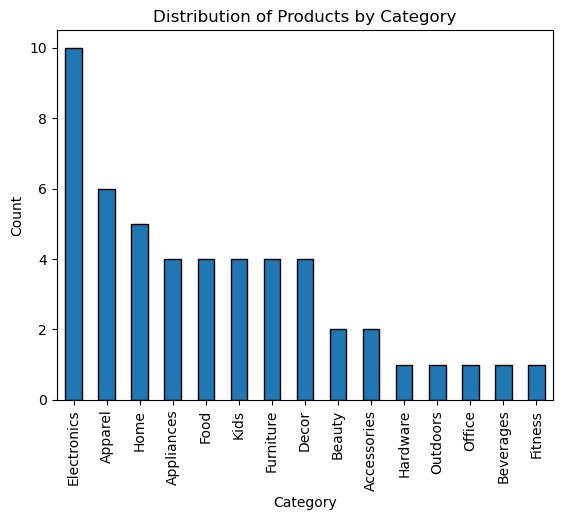

In [24]:
# Assuming 'products' is your DataFrame containing product information
df = pd.DataFrame(products_data)

# Count the occurrences of each category
category_counts = df['Category'].value_counts()

# Plot a bar chart of category counts
category_counts.plot(kind='bar', edgecolor='black')  # Plotting a bar chart
plt.xlabel('Category')  # Label the x-axis as 'Category'
plt.ylabel('Count')  # Label the y-axis as 'Count'
plt.title('Distribution of Products by Category')  # Set the title of the plot
plt.show()  # Display the plot

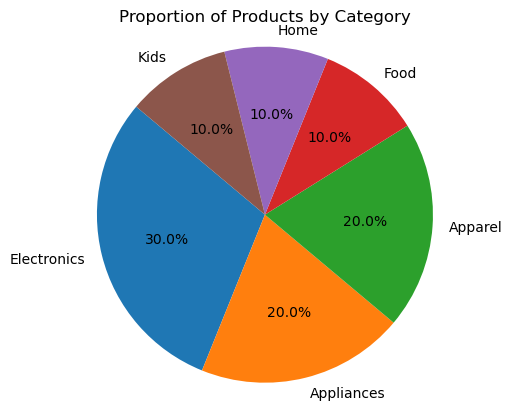

In [25]:
# Assuming 'products' is your DataFrame containing product information
# Limiting DataFrame to the first 10 rows for demonstration purposes
df = pd.DataFrame(products_data).head(10)

# Calculate the proportion of each category
category_proportions = df['Category'].value_counts(normalize=True)

# Define custom colors for the pie chart
#colors = ['skyblue', 'lightgreen', 'lightcoral', 'lightsalmon']

# Plot a pie chart of category proportions
plt.pie(category_proportions, labels=category_proportions.index, autopct='%1.1f%%', startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Proportion of Products by Category')  # Title of the pie chart
plt.show()  # Display the pie chart

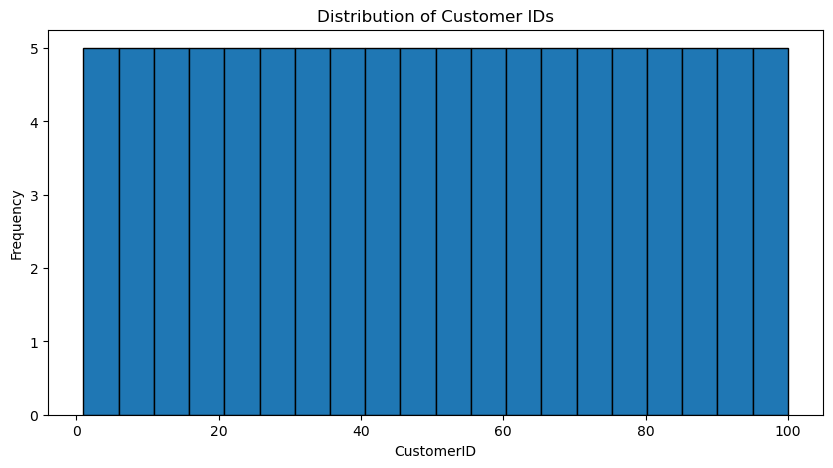

In [28]:
# Assuming 'customers' is your DataFrame containing customer information
df = pd.DataFrame(customers_data)

# Histogram for CustomerID
plt.figure(figsize=(10, 5))
plt.hist(df['CustomerID'], bins=20, edgecolor='black')  # Plotting a histogram
plt.xlabel('CustomerID')  # Label the x-axis as 'CustomerID'
plt.ylabel('Frequency')  # Label the y-axis as 'Frequency'
plt.title('Distribution of Customer IDs')  # Set the title of the plot
plt.show()  # Display the histogram

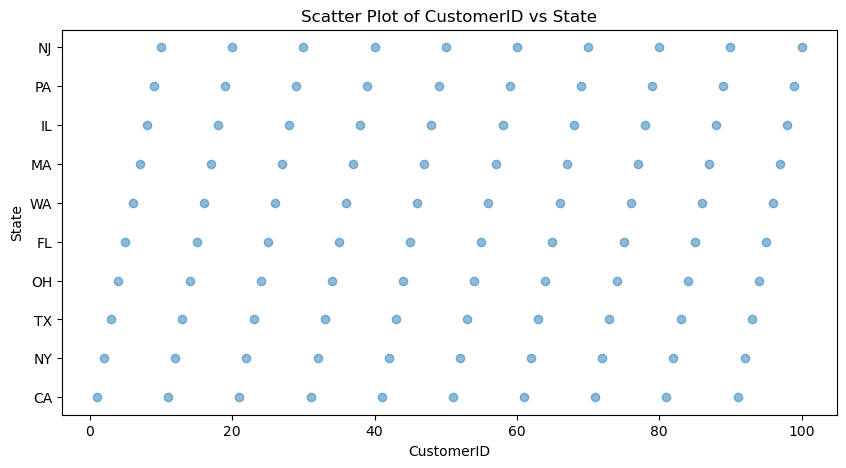

In [30]:
# Assuming 'customers' is your DataFrame containing customer information
df = pd.DataFrame(customers_data)
# Scatter plot between CustomerID and Age
plt.figure(figsize=(10, 5))
plt.scatter(df['CustomerID'], df['State'], alpha=0.5)  # Plotting a scatter plot
plt.xlabel('CustomerID')  # Label the x-axis as 'CustomerID'
plt.ylabel('State')  # Label the y-axis as 'Age'
plt.title('Scatter Plot of CustomerID vs State')  # Set the title of the plot
plt.show()  # Display the scatter plot

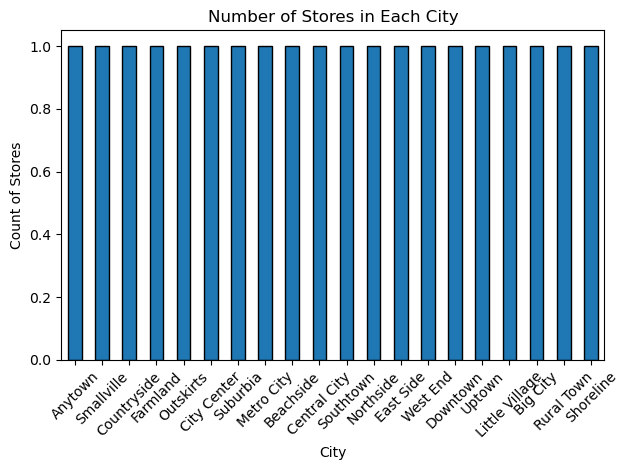

In [31]:
# Assuming 'stores' is your DataFrame containing store information
df = pd.DataFrame(stores_data).head(20)

# Count the occurrences of each city
city_counts = df['City'].value_counts()

# Plot a bar chart of city counts
city_counts.plot(kind='bar', edgecolor='black')
plt.xlabel('City')
plt.ylabel('Count of Stores')
plt.title('Number of Stores in Each City')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()

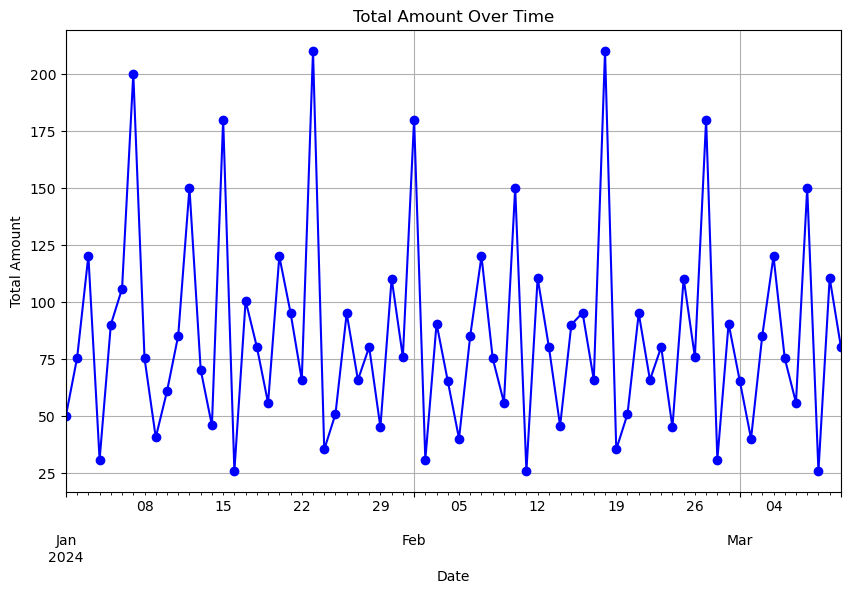

In [32]:
# Assuming 'transactions' is your DataFrame containing transaction information
df = pd.DataFrame(transactions_data)

# Convert TransactionDate to datetime using the correct format
df['TransactionDate'] = pd.to_datetime(df['TransactionDate'], format='%d-%m-%Y')

# Group by TransactionDate and sum TotalAmount for each date
daily_total = df.groupby('TransactionDate')['TotalAmount'].sum()

# Plot a line graph of TotalAmount over time
plt.figure(figsize=(10, 6))  # Set the figure size
daily_total.plot(kind='line', marker='o', linestyle='-', color='b')

# Add labels and title
plt.xlabel('Date')  # Label for the x-axis
plt.ylabel('Total Amount')  # Label for the y-axis
plt.title('Total Amount Over Time')  # Title of the plot

# Add gridlines for better readability
plt.grid(True)

# Show the plot
plt.show()